In [1]:
import pandas as pd
%matplotlib inline
pwt = pd.read_stata('pwt90.dta')

In [2]:
pwt.columns

Index(['countrycode', 'country', 'currency_unit', 'year', 'rgdpe', 'rgdpo',
       'pop', 'emp', 'avh', 'hc', 'ccon', 'cda', 'cgdpe', 'cgdpo', 'ck',
       'ctfp', 'cwtfp', 'rgdpna', 'rconna', 'rdana', 'rkna', 'rtfpna',
       'rwtfpna', 'labsh', 'delta', 'xr', 'pl_con', 'pl_da', 'pl_gdpo',
       'i_cig', 'i_xm', 'i_xr', 'i_outlier', 'cor_exp', 'statcap', 'csh_c',
       'csh_i', 'csh_g', 'csh_x', 'csh_m', 'csh_r', 'pl_c', 'pl_i', 'pl_g',
       'pl_x', 'pl_m', 'pl_k'],
      dtype='object')

In [3]:
stupci_države = ['countrycode', 'country', 'currency_unit']
države = pwt[stupci_države].drop_duplicates()
države.head()
# [države.duplicated(stupac).any() for stupac in stupci_države]

,countrycode,country,currency_unit
0,ABW,Aruba,Aruban Guilder
65,AGO,Angola,Kwanza
130,AIA,Anguilla,East Caribbean Dollar
195,ALB,Albania,Lek
260,ARE,United Arab Emirates,UAE Dirham


In [4]:
{stupac: države.duplicated(stupac).any() for stupac in stupci_države}

{'country': False, 'countrycode': False, 'currency_unit': True}

In [5]:
del pwt['countrycode'], pwt['currency_unit']
pwt.set_index(['country', 'year'], inplace=True)
pwt.dropna(thresh=2, inplace=True)

In [6]:
[column for column in pwt.columns if 'gdp' in column]

['rgdpe', 'rgdpo', 'cgdpe', 'cgdpo', 'rgdpna', 'pl_gdpo']

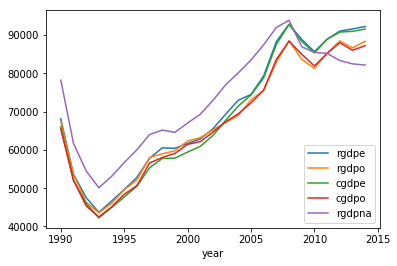

In [13]:
pwt.loc['Croatia'][['rgdpe', 'rgdpo', 'cgdpe', 'cgdpo', 'rgdpna']].plot()

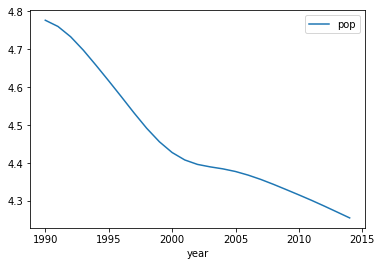

In [7]:
pwt.loc['Croatia'][['pop']].plot()

In [15]:
gdp_države = pwt['cgdpe'].unstack('country')
ggd = lambda *države: gdp_države[list(države)].plot(logy=True)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


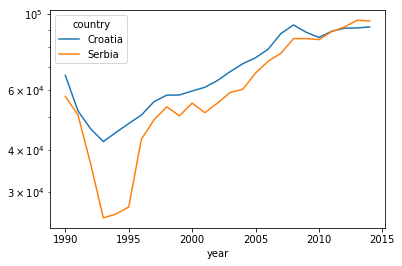

In [16]:
ggd('Croatia', 'Serbia')

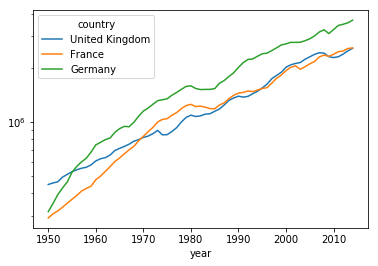

In [221]:
ggd('United Kingdom', 'France', 'Germany')

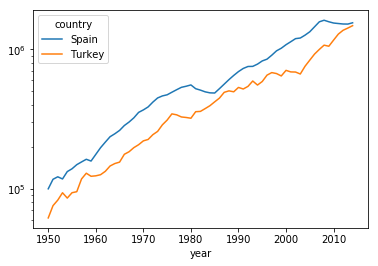

In [222]:
ggd('Spain', 'Turkey')

C:\Users\Veky\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


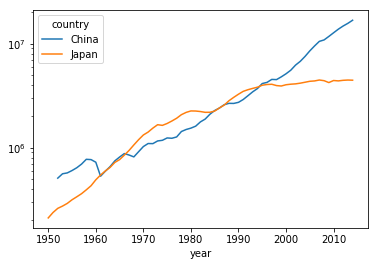

In [223]:
ggd('China', 'Japan')

C:\Users\Veky\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


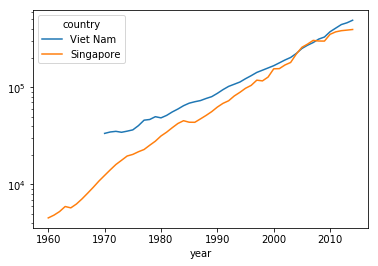

In [224]:
ggd('Viet Nam', 'Singapore')

C:\Users\Veky\Anaconda3\lib\site-packages\matplotlib\scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


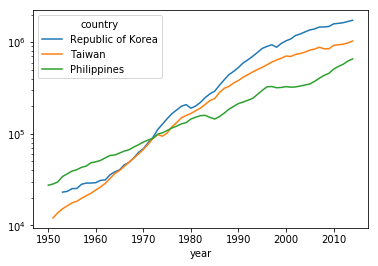

In [225]:
ggd('Republic of Korea', 'Taiwan', 'Philippines')